In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\91983\AppData\Local\Temp/ipykernel_17180/1603139056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'age qq plot')

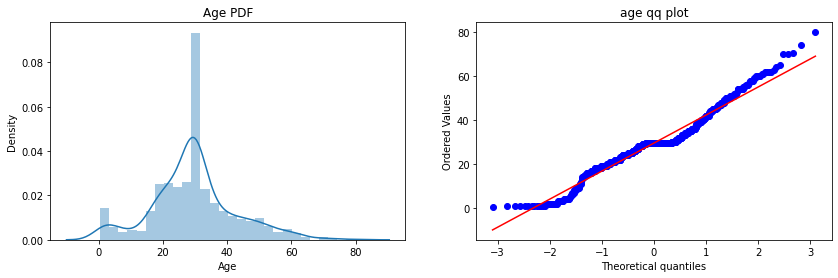

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('age qq plot')

C:\Users\91983\AppData\Local\Temp/ipykernel_17180/264091824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


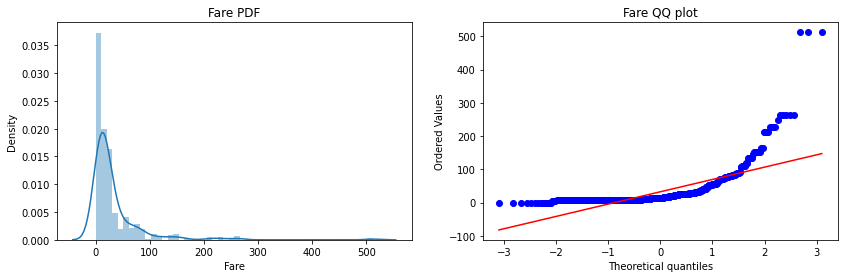

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ plot')
plt.show()

## Without Tranformation

In [23]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [25]:
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)

print("accuracy_score : ",accuracy_score(y_test,y_pred))
print("Accuracy DT : ",accuracy_score(y_test,y_pred1))

accuracy_score :  0.6480446927374302
Accuracy DT :  0.6703910614525139


## With Transformation

In [27]:
trf = FunctionTransformer(func=np.log1p)

In [28]:
x_train_tranformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [30]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(x_train_tranformed,y_train)
clf1.fit(x_train_tranformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf1.predict(x_test_transformed)

print("accuracy_score : ",accuracy_score(y_test,y_pred))
print("Accuracy DT : ",accuracy_score(y_test,y_pred1))

accuracy_score :  0.6815642458100558
Accuracy DT :  0.664804469273743
